## Conversão WebPage - Teste A/B

Na expectativa de aumentar suas conversões, uma empresa no ramo de e-commerce fez uma mudança da sua webpage, na pagina antiga o processo de preenchimento do cartão de crédito é feito manualmente na pagina nova esse preenchimento é feito de forma automática. 

O Product Mannager disse a você que a taxa de conversão atual é de aproximadamente de 13% em média ao longo do ano e que a equipe consideraria um sucesso o novo design caso as converções aumentassem para 15%. 


**Conversão:**<br>
0 - O usuário acessou a pagina mas não comprou um produto.<br>
1 - O usuário acessou a pagina e comprou um produto.

### Hipotese

$H_{0}:\mu_{old} = \mu_{new}$ , a média de conversão da pagina antiga é igual a média de conversão da pagina nova<br>
$H_{1}:\mu_{old} \neq \mu_{new}$ , a média de conversão da pagina antiga é diferente da média de conversão da pagina nova

Nivél de significância: 0,05.

In [38]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime, time, date
import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil
from scipy.stats import norm

In [2]:
data = pd.read_csv('data/ab_data.csv')

In [3]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### Data preprossesing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [6]:
data['timestamp'].min(), data['timestamp'].max()

(Timestamp('2017-01-02 13:42:05.378582'),
 Timestamp('2017-01-24 13:41:54.460509'))

In [7]:
data["landing_page"].value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [8]:
print(data["user_id"].count() - data["user_id"].nunique())

3894


In [9]:
data.drop_duplicates(subset=['user_id'], inplace=True, keep='first')

In [10]:
ts=data[['converted','landing_page','group']].set_index(data['timestamp']).sort_index(ascending=True)
ts

,converted,landing_page,group
timestamp,,,
2017-01-02 13:42:05.378582,0,new_page,treatment
2017-01-02 13:42:15.234051,0,old_page,control
2017-01-02 13:42:21.786186,0,old_page,control
2017-01-02 13:42:26.640581,0,new_page,treatment
2017-01-02 13:42:27.851110,0,new_page,treatment
...,...,...,...
2017-01-24 13:41:18.869978,0,old_page,treatment
2017-01-24 13:41:19.152664,0,old_page,control
2017-01-24 13:41:44.097174,0,new_page,treatment


### Ready to Work

In [24]:
ts_new_page = ts.loc[ts['landing_page'] == 'new_page']

In [25]:
ts_new_count= ts_new_page[['converted']].resample('D').count().rename(columns={'converted':'daily acess'})
ts_new_sum = ts_new_page.resample('D').sum().rename(columns={'converted':'daily conversion'})
ts_new_mean = ts_new_page.resample('D').mean().rename(columns={'converted':'daily conversion ratio'})
ts_new_std = ts_new_page.resample('D').std().rename(columns={'converted':'daily conversion ratio std'})
ts_new_results = pd.concat([ts_new_count, ts_new_sum, ts_new_mean, ts_new_std], axis=1)
ts_new_results

,daily acess,daily conversion,daily conversion ratio,daily conversion ratio std
timestamp,,,,
2017-01-02,2850,340,0.119298,0.324196
2017-01-03,6631,755,0.113859,0.317664
2017-01-04,6538,763,0.116702,0.321090
2017-01-05,6503,742,0.114101,0.317959
2017-01-06,6740,837,0.124184,0.329816
2017-01-07,6598,765,0.115944,0.320182
2017-01-08,6710,815,0.121461,0.326686
2017-01-09,6613,782,0.118252,0.322931
2017-01-10,6691,850,0.127036,0.333039


In [26]:
ts_old_page = ts.loc[ts['landing_page'] == 'old_page']

In [27]:
ts_old_count= ts_old_page[['converted']].resample('D').count().rename(columns={'converted':'daily acess'})
ts_old_sum = ts_old_page.resample('D').sum().rename(columns={'converted':'daily conversion'})
ts_old_mean = ts_old_page.resample('D').mean().rename(columns={'converted':'daily conversion ratio'})
ts_old_std = ts_old_page.resample('D').std().rename(columns={'converted':'daily conversion ratio std'})
ts_old_results = pd.concat([ts_old_count, ts_old_sum, ts_old_mean, ts_old_std], axis=1)
ts_old_results

,daily acess,daily conversion,daily conversion ratio,daily conversion ratio std
timestamp,,,,
2017-01-02,2848,357,0.125351,0.331175
2017-01-03,6589,747,0.113371,0.317070
2017-01-04,6568,800,0.121803,0.327083
2017-01-05,6417,793,0.123578,0.329125
2017-01-06,6612,766,0.115850,0.320069
2017-01-07,6601,796,0.120588,0.325672
2017-01-08,6677,794,0.118916,0.323714
2017-01-09,6635,791,0.119216,0.324067
2017-01-10,6653,757,0.113783,0.317572


<AxesSubplot:title={'center':'Webpage daily conversion'}, xlabel='timestamp', ylabel='daily conversion'>

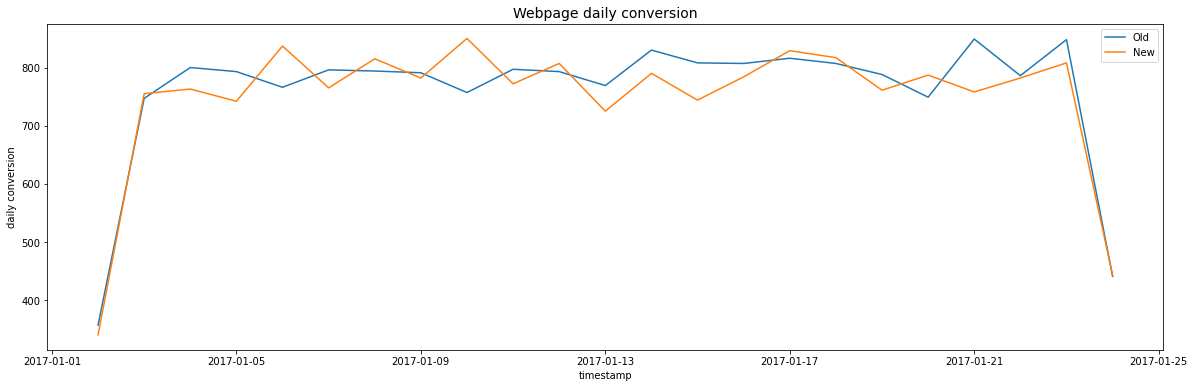

In [28]:
plt.figure(figsize=(20,6))
plt.title("Webpage daily conversion", fontsize=14)
sns.lineplot(data = ts_old_results, x =ts_old_results.index, y = "daily conversion", label='Old')
sns.lineplot(data = ts_new_results, x =ts_new_results.index, y = "daily conversion", label='New')

<AxesSubplot:title={'center':'Webpage daily conversion rate'}, xlabel='timestamp', ylabel='daily conversion ratio'>

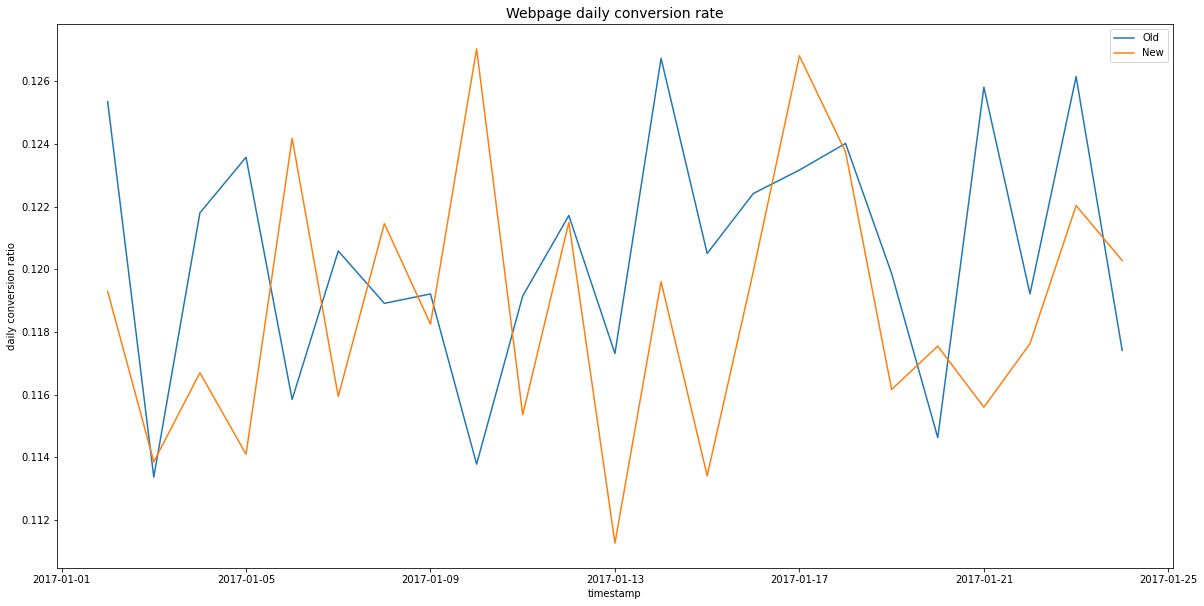

In [29]:
plt.figure(figsize=(20,10))
plt.title("Webpage daily conversion rate", fontsize=14)
sns.lineplot(data = ts_old_results, x =ts_old_results.index, y = "daily conversion ratio", label='Old')
sns.lineplot(data = ts_new_results, x =ts_new_results.index, y = "daily conversion ratio", label='New')

In [30]:
data_gc = data.groupby(['landing_page','converted']).agg({'converted': len}).rename(columns={'converted':'converted counts'})
data_gct = data.groupby('landing_page').agg({'converted': len}).rename(columns={'converted':'counts'})
data_gm = data.groupby('landing_page').agg({'converted': np.mean, 'converted': np.mean}).rename(columns={'converted':'converted mean'})
data_gs = data.groupby('landing_page').agg({'converted': np.sum, 'converted': np.sum}).rename(columns={'converted':'converted sum'})
# data_gc = data.groupby('group').agg({'spent': len, 'purchases': len}).rename(columns={'spent':'spent counts', 'purchases':'purchases counts'})

resume_pages = pd.concat([data_gct, data_gm, data_gs], axis=1)
resume_pages

,counts,converted mean,converted sum
landing_page,,,
new_page,145320,0.118745,17256
old_page,145264,0.120395,17489


### Teste de Normalidade

$H_{0}:$ , a taxa média de conversões segue uma distribuição é Normal<br>
$H_{1}:$ , a taxa média de conversões não segue uma distribuição é Normal<br>

In [31]:
old_page=ts_old_results['daily conversion ratio'].to_numpy()
new_page=ts_new_results['daily conversion ratio'].to_numpy()

In [32]:
def check_normality(data, data_name=''):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print(f"p-value =  {p_value_normality:.4f}")  
    
    alpha= 0.05
    
    plt.figure(figsize=(12,7))
    plt.subplot( 2, 2, 1)
    sns.distplot(data, fit=norm);
    plt.subplot( 2, 2, 2)
    stats.probplot(data, plot=plt);
    
    if p_value_normality < alpha:
        print(f'Rejeitamos H0, a distribuição {data_name} não é normal. \n')
    else:
        print(f'Aceitamos H0, a distribuição {data_name} é normal. \n')  

p-value =  0.6026
Aceitamos H0, a distribuição da "pagina antiga" é normal. 



C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


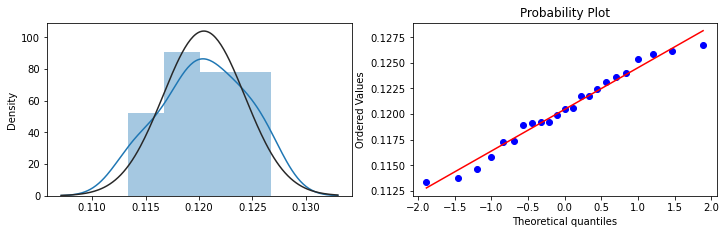

In [33]:
check_normality(old_page, 'da "pagina antiga"')

p-value =  0.7877
Aceitamos H0, a distribuição da "pagina nova" é normal. 



C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


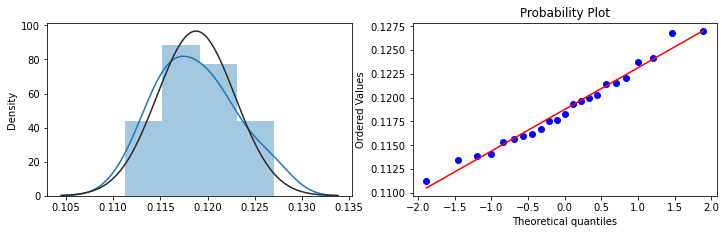

In [34]:
check_normality(new_page, 'da "pagina nova"')

### Teste de Variancia

$H_{0}:$ , a variancia é a mesma<br>
$H_{1}:$ , a variancia não é a mesma

In [35]:
stat, pvalue_levene= stats.levene(old_page,new_page)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Rejeitamos H0 a variancia das amostras são diferentes.")
else:
    print("Aceitamos H0 a variancia das amostras é a mesma.")

p value:0.7217
Aceitamos H0 a variancia das amostras é a mesma.


### Assumptions:

**A distribuição é continua ou discreta?**
* Continua, pois a taxa média de conversão é um valor continuo.

**As distribuições são dependentes ou independentes?** 
* Independendes, pois um mesmo usuário acessa apenas uma unica pagina uma unica vez.
  
**A distribuição é normal?** 
* Sim, pois passaram no teste de normalidade de Shapiro- Wilk
  
**A variancia é a mesma?** 
* Sim, pois passaram no teste de variancia de levene 

**Quantos grupos?** 
* Dois


Seguindo o diagrama o teste de hipoteses escolhido será o **T Test** para amostras independentes, paramétricas, com dois grupos.

In [36]:
ttest,p_value = stats.ttest_ind(old_page,new_page)
print(f"p-value =  {p_value:.8f}")
if p_value <0.05:
    print("Rejeita H0")
else:
    print("Aceita H0")

p-value =  0.16676644
Aceita H0


## Conclusão

Nesse nível de significância, há evidências suficientes para concluir que a taxa média de conversão da pagina antiga é igual a taxa média de conversão da pagina nova. Em outras palavras a pagina nova não obteve os resultados esperados, outro estudo seria necessário para averiguar as causas.

## Q & A

Apesar dessa ser uma base de estudos ela é totalmente aplicavel num exemplo real e algumas perguntas/respostas interessantes podem ser feitas a partir desse estudo...

**Quantas amostras são necessárias para termos resultados estatisticos significantes?**

In [37]:
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Choen d

# baseline_rate = conversions_control / total_users_control
# practical_significance = 0.02 #user defined
# effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)


# Calcula o numero de amostras necessárias 
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, # 1 - Beta >> Comumente o Beta é escolhido como 0.2
    alpha=0.05, 
    ratio=1
    )                                                  

# arredonta o numero para cima e o mantém como inteiro 
required_n = ceil(required_n)                                                  

print(f"Serão necessárias {required_n} amostras para cada grupo.")

Serão necessárias 4720 amostras para cada grupo.


Em outras palavras são necessáriois no minimo 4720  amostras para cada pagina para que nosso teste tenha 80% de chance de retornar resultados significantes estatisticamente

No entando a taxa média de conversão apresentou valores inferiores a 13% em todos os dias avaliados, o que leva a crer ou que o product Manager nos forneceu uma informação errada ou a nossa amostra é baixa comparado a taxa média anual.

**Quanto tempo devemos executar nossos testes?**

Não existe uma resposta certa, nessa base de dados o autor original testou diariamente metade dos usuários na página nova, esse numero poderia ser menor, a nivel estatistico seriam necessárias no mínimo 4720 amostras de cada pagina, o que no segundo dia de experimento foi alcançado.

**Quando deveriamos parar de executar nossos testes?**

Neste exemplo a taxa de média de conversão diaria da pagina nova foi menor que a taxa de conversão da pagina antiga na maioria dos dias, não há nenhum indício que a taxa de média de conversão diaria da pagina nova iria aumentar se continuássemos os testes.

**Como os usuários são encaminhados para as paginas de controle/tratamento?**

Neste exemplo o autor original dividiu a base de dados metade para tratamento e metade para controle e coletou as amostras durante 22 dias.

**Quais as causa para o fracasso da pagina nova?**

Por mais que a intenção da pagina nova seja melhorar, a realidade pode ser diferente algumas das hipoteses podem ser:
* Problemas na pagina como lentidão, erro no carregamento do cartão  que fez com que alguns usuários desistissem da compra.
* Menus confusos, por mais que a intenção seja melhorar os menus não ficaram tão claros
* Os usuários já estavam muito acostumados com a interface antiga e desconfiaram ou não conseguiram usar a pagina nova então acabaram desistindo da compra